In [6]:
import pandas as pd
from PIL import Image

In [7]:
img = Image.open('tinywow_letok-11-2023-web_26381759_22.png')

In [2]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("pierreguillou/lilt-xlm-roberta-base-finetuned-with-DocLayNet-base-at-linelevel-ml384")

model = AutoModelForTokenClassification.from_pretrained("pierreguillou/lilt-xlm-roberta-base-finetuned-with-DocLayNet-base-at-linelevel-ml384")

In [1]:
from transformers import pipeline

/Users/tomislav/Library/Caches/pypoetry/virtualenvs/angebotmk-ml-Gpt_k2Fo-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
from transformers import LayoutLMv3Processor, LayoutLMv3ForTokenClassification
from PIL import Image

processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-large")

image = Image.open('tinywow_letok-11-2023-web_26381759_22.png').convert("RGB")
encoding = processor(
    image, return_tensors="pt"
)  # you can also add all tokenizer parameters here such as padding, truncation
print(encoding.keys())
# dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'bbox', 'image'])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
dict_keys(['input_ids', 'attention_mask', 'bbox', 'pixel_values'])


In [81]:
model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-large")

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [82]:
outputs = model(**encoding)
loss = outputs.loss
logits = outputs.logits

/Users/tomislav/Library/Caches/pypoetry/virtualenvs/angebotmk-ml-Gpt_k2Fo-py3.11/lib/python3.11/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [83]:
encoding.keys()

dict_keys(['input_ids', 'attention_mask', 'bbox', 'pixel_values'])

In [84]:
from torchvision import transforms
from torchvision.utils import draw_bounding_boxes, save_image

In [85]:
tr = transforms.PILToTensor()

In [86]:
tensor_img = draw_bounding_boxes(tr(image), encoding['bbox'][0])

In [87]:
tensor_to_pil = transforms.ToPILImage()

In [88]:
new_img = tensor_to_pil(tensor_img)

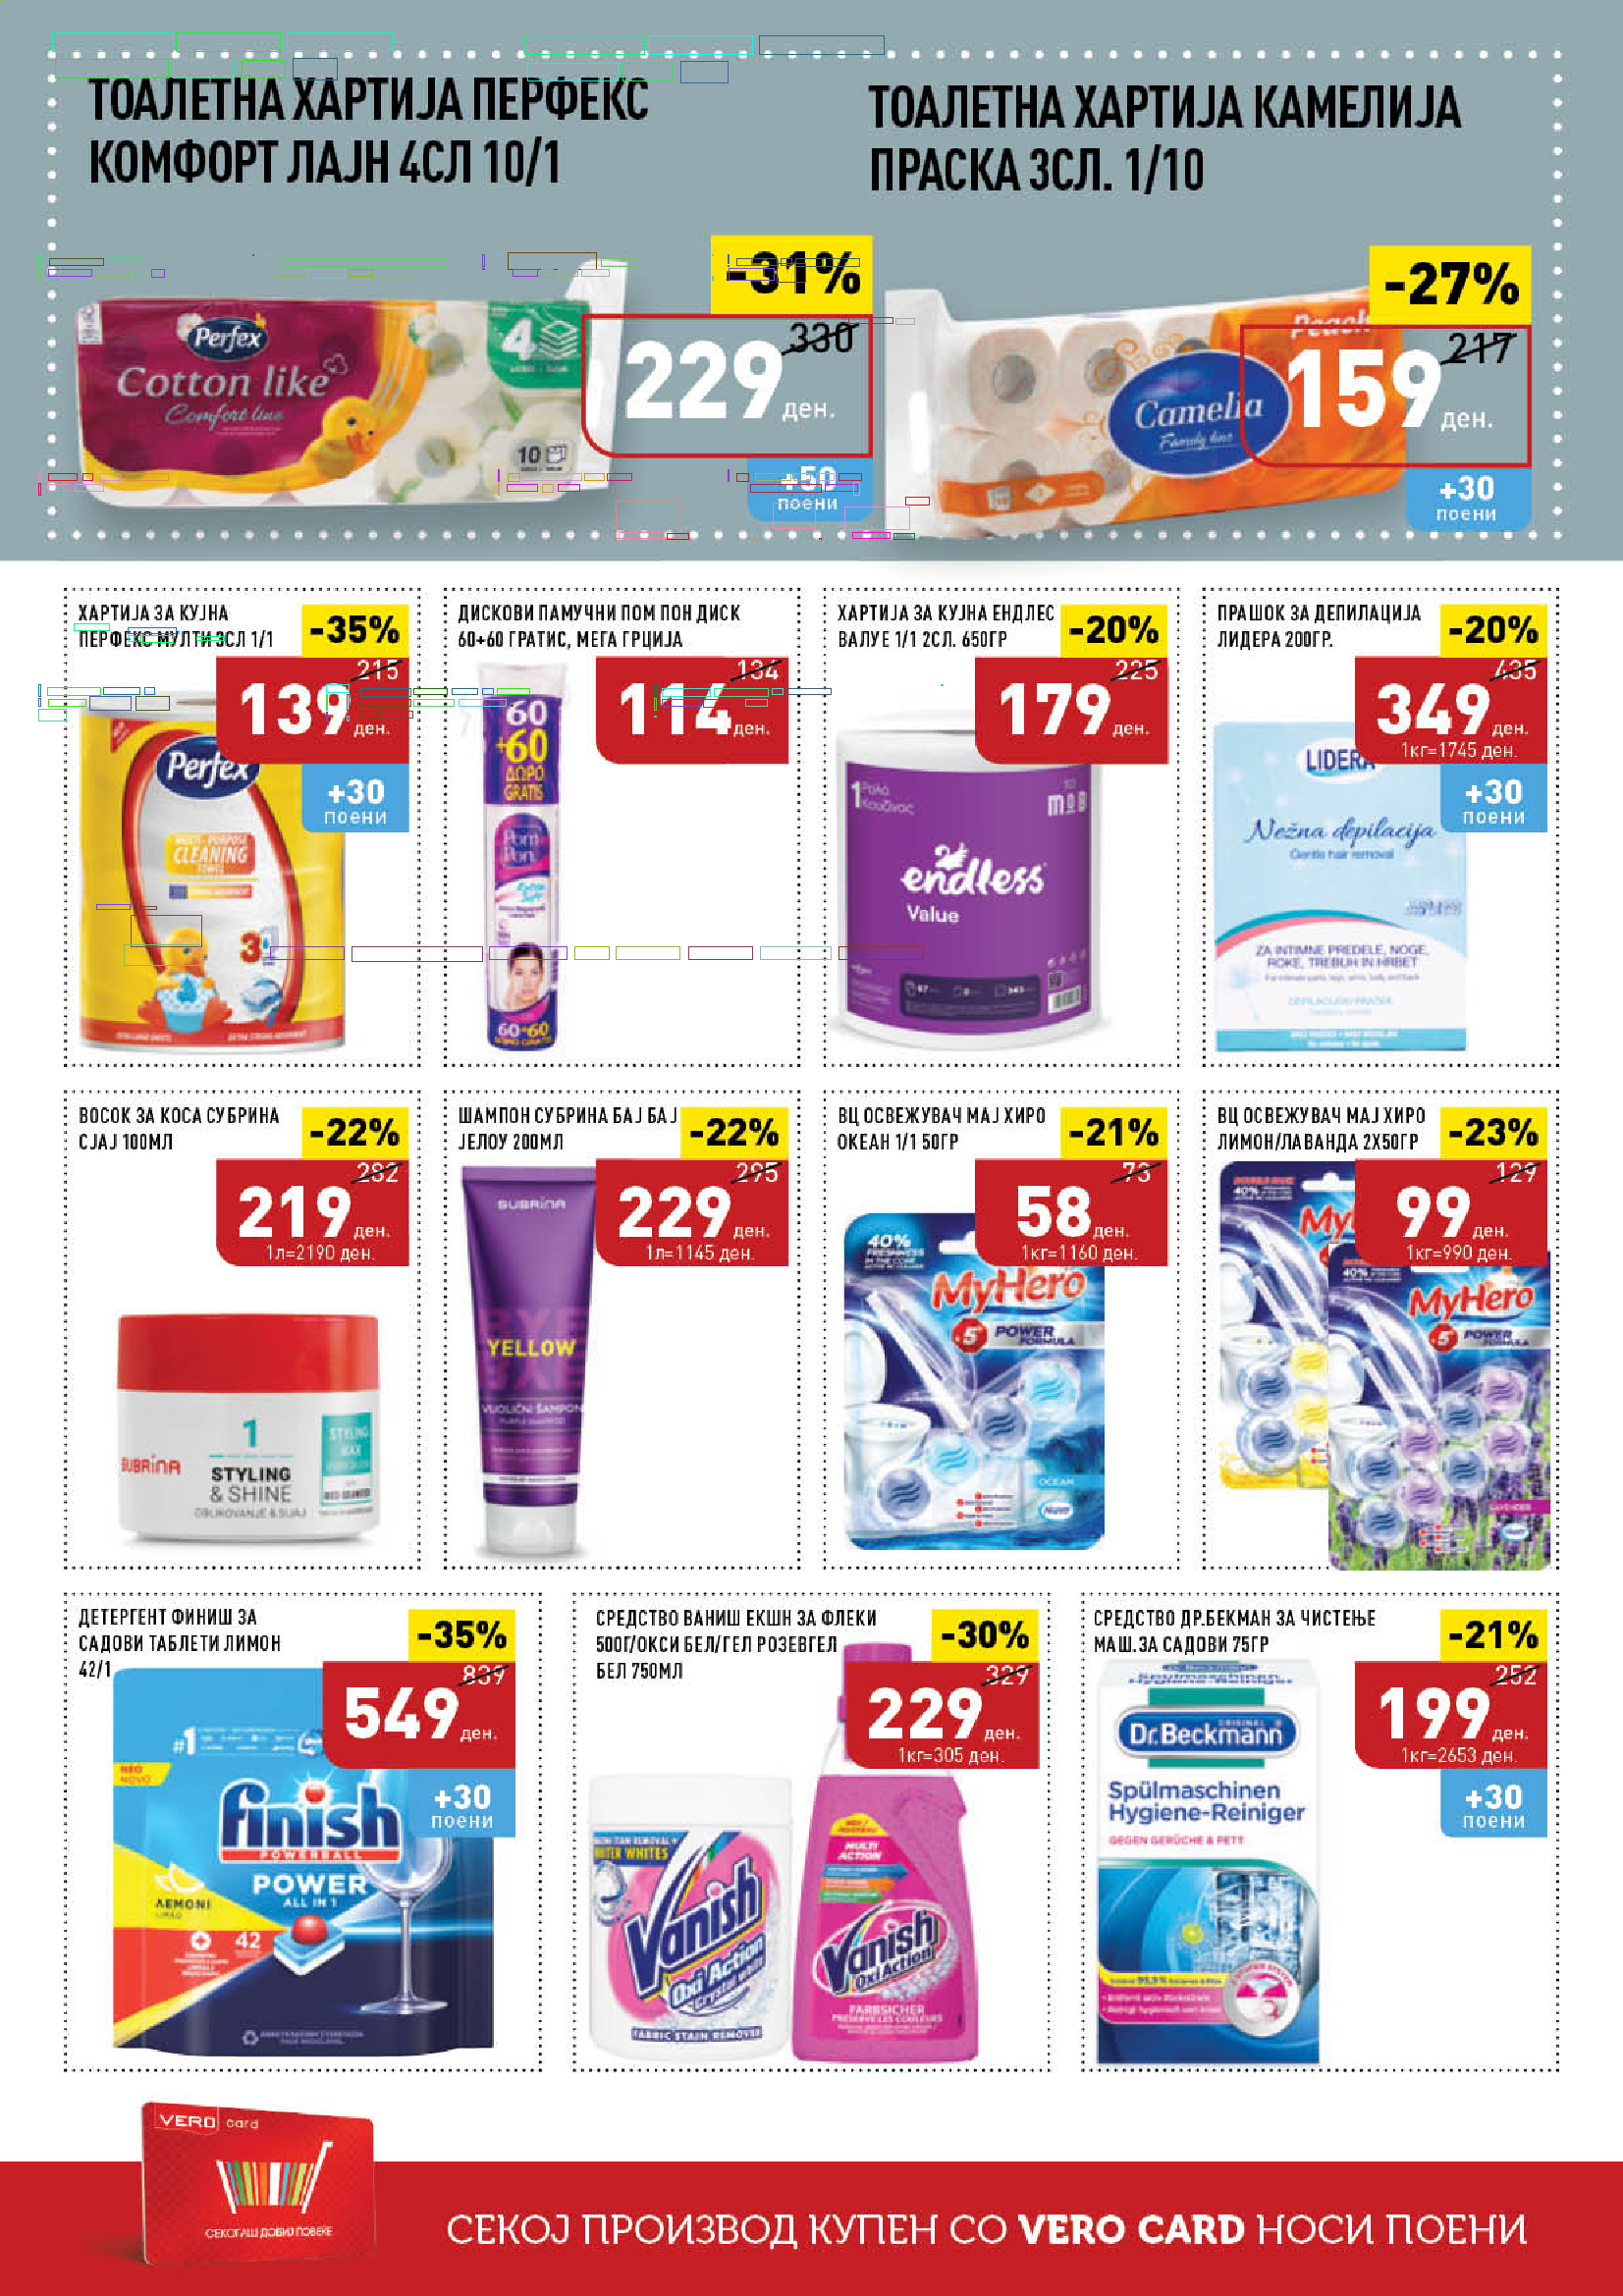

In [89]:
new_img